In [4]:
#######################
# Interpolates some f #
#######################
import radiant as rad
import numpy as np


# Problem Parameters
a = -1.
b = 1


def exact(*x):
    return np.prod(np.cos((2 * np.pi * np.asarray(x) / (b - a)) ** 2) * 2 * np.pi * np.asarray(x) / (b - a), axis=0)


f = exact

In [5]:
# Parameters
d = 2
k = 1
delta = 0.5
N = 13

# Computed Parameters
ranges = ((a, b),) * d
phi = rad.Wendland(d, k)
xc = rad.gridn(ranges, N, flat=True)
integrator = rad.integrate.MeanIntegrator(ranges, 200)
# integrator = rad.integrate.QuadIntegrator(ranges)

# Solve for approximate solution
solver = rad.solve.InterpolationSolver(phi, delta, *xc)
approx = solver.solve(f)
error = rad.error(exact, approx, integrator)

print("L2 Relative Error:", error)
print("Condition Number:", solver.cond())

L2 Relative Error: 0.09759831091271264
Condition Number: 1441.7938472276621


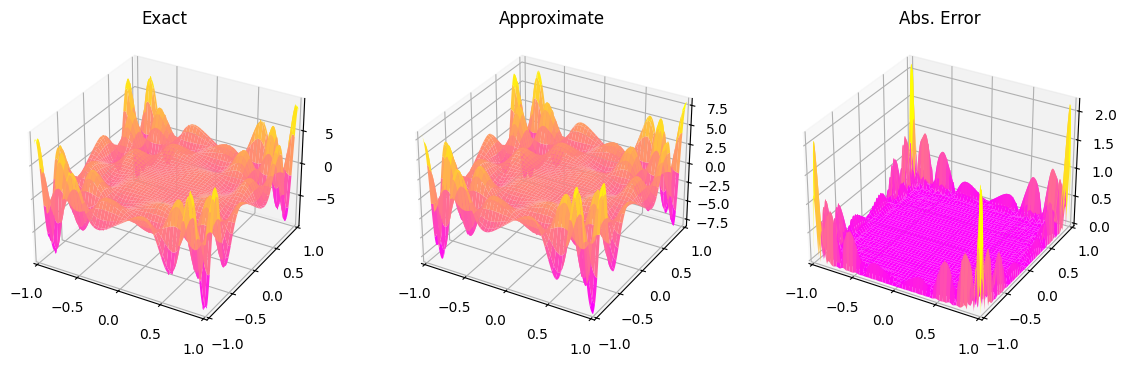

In [6]:
rad.plot.spread(
    ranges,
    exact,
    approx,
    lambda *x: np.abs(exact(*x) - approx(*x)),
    n=200,
    titles=["Exact", "Approximate", "Abs. Error"],
    figsize=(15, 4)
)